In [126]:
%matplotlib inline

#load dependancies
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
from scipy.io import wavfile
from IPython.display import Audio

In [63]:
#Function that will load the data of a WAV file given.
#returns the sampling rate of the song, and the data array itself.

#################  NOTE ##################
#If working with MP3 files, please convert to wav with given conversion file in repository.
#Command for that is "python3 convert.py [songname].mp3 [songname].wav"

def loadData (str):
    rate, data = wavfile.read(str)
    if (len(data.T) > 1):
        data = data.T[0]
    return rate, data

In [182]:
#Function that performs FFT on a randomly sampled portion of data array given.
#Returns the FFT result and the random interval.
def fft (data, intervalSize, rangeofFreq):
    if (len(data) < intervalSize):
        return None;
    start = np.random.randint(0, len(data) - intervalSize + 1)
    chunked = data[start:(start + intervalSize)]
    interv = (start, start + intervalSize)
    return fftpack.fft(chunked, rangeofFreq), interv

In [177]:
#load the data, perform FFT.
freq, data = loadData('input.wav')
result, randInterval = fft(data, 500000, 20000)

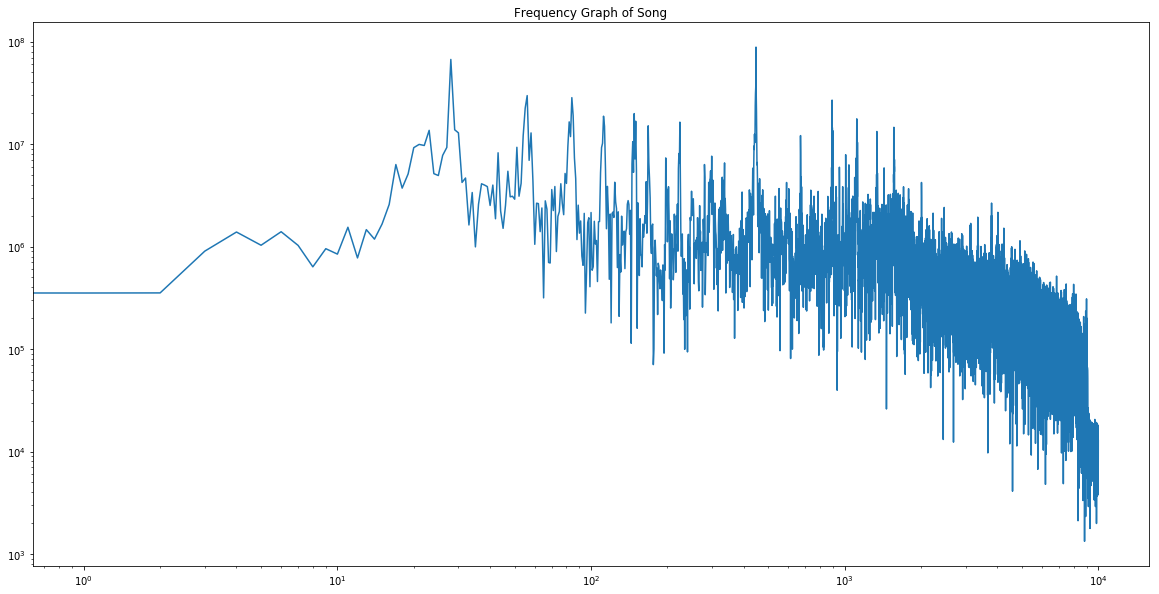

<function matplotlib.pyplot.show>

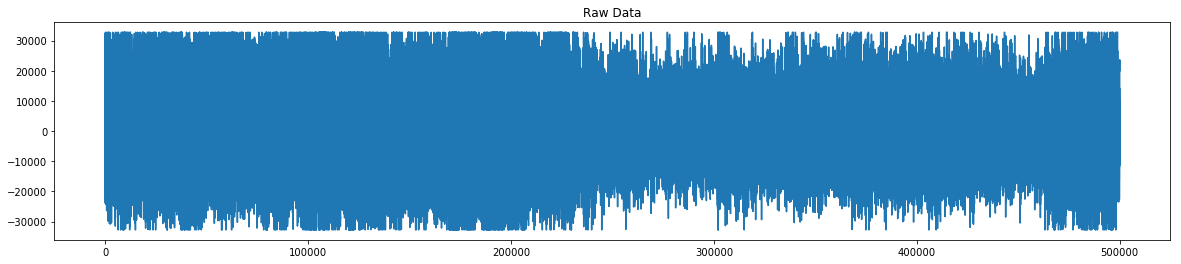

In [179]:
#Take first half because conjugate symmetry. Range of human hearing is 0 to 150000.
magnitudes = [np.absolute(y) for y in result[0:10000]]

plt.figure(figsize=(20, 10))
plt.xscale('log');plt.yscale('log');plt.title("Frequency Graph of Song");
plt.plot(magnitudes)
plt.show()

plt.figure(figsize=(20, 4))
plt.title("Raw Data")
plt.plot(data[randInterval[0]:randInterval[1]])
plt.show


Subbass:
6150866.59399
Bass:
2620150.18993
Mids:
1470925.27246
High Mids:
367191.794577
Highs:
97628.8988405


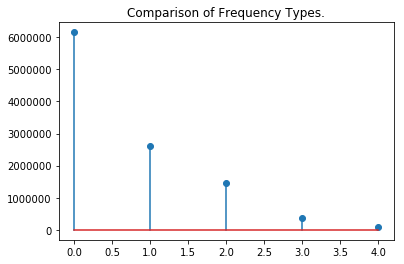

In [180]:
subbass = magnitudes[0:60]
bass = magnitudes[60:300]
mids = magnitudes[300:2000]
highmids = magnitudes[2000:6000]
highs = magnitudes[6000:15000]

subbassAvg = np.average(subbass)
bassAvg = np.average(bass)
midsAvg = np.average(mids)
highmidsAvg = np.average(highmids)
highsAvg = np.average(highs)

print("Subbass:")
print(subbassAvg)

print("Bass:")
print(bassAvg)

print("Mids:")
print(midsAvg)

print("High Mids:")
print(highmidsAvg)

print("Highs:")
print(highsAvg)

arr = [subbassAvg, bassAvg, midsAvg, highmidsAvg, highsAvg]

plt.stem(arr)
plt.title("Comparison of Frequency Types.")
plt.show()



In [168]:
#Here is the randomly sampled portion of the song.
#Feel free to listen.

Audio(data[randInterval[0]:randInterval[1]], rate= freq)

In [149]:
#0 to 60 subbass
#60  to 300 bass
#300 to 2000 midrange
#2000 to 6000 high mids
#6000-15000 high freqs